# Connectivity Data Analysis with Study Class

This notebook covers:
- Loading study data
- Running regression models
- Creating specification curves

## 1. Loading the Data

First, we'll import the Study class and load both the unmerged and merged datasets.

In [1]:
from conn_db import Study

# Load unmerged and merged study datasets
study = Study.load("study_unmerged.cdb")
study2 = Study.load("study_merged.cdb")


Study loaded successfully from study_unmerged.cdb
Study loaded successfully from study_merged.cdb


## 2. Exploring the Data

Let's examine the basic properties of both datasets using the `summary()` method.

In [2]:
print("Unmerged study summary:")
study.summary()

Unmerged study summary:
Study summary: 9240 measurements loaded

Nodes by label:
CEN:
       L-ITG, L-SFG, L-SUP, L-pSTG, R-IFG, R-ITG, R-SFG, R-SUP, R-pSTG
DMN:
       L-ANG, L-IFG, L-PREC, L-aSTG, L-mPFC, R-ANG, R-PREC, R-aSTG, R-mPFC
SN:
       L-ACC, L-INS, R-ACC, R-INS

Measurement conditions:
  city: Kraków, Warszawa
  eyes: eyes closed, eyes open
  waves: alpha, beta, delta, gamma, theta

Samples:
  Sample ID: city_Kraków, Subjects: 40
  Sample ID: city_Warszawa, Subjects: 67


In [3]:
print("\nMerged study summary:")
study2.summary()


Merged study summary:
Study summary: 4620 measurements loaded

Nodes by label:
CEN:
       L-ITG, L-SFG, L-SUP, L-pSTG, R-IFG, R-ITG, R-SFG, R-SUP, R-pSTG
DMN:
       L-ANG, L-IFG, L-PREC, L-aSTG, L-mPFC, R-ANG, R-PREC, R-aSTG, R-mPFC
SN:
       L-ACC, L-INS, R-ACC, R-INS

Measurement conditions:
  city: merged(Kraków,Warszawa)
  eyes: eyes closed, eyes open
  waves: alpha, beta, delta, gamma, theta

Samples:
  Sample ID: merged_sample, Subjects: 107


## 3. Regression Analysis

Now let's run regression models on our data. We'll try different formulations and compare the results.

### Model 1: (Unmerged Data)

In [16]:
# Model using waves, city, eyes and network relation in unmerged data
model1_results = study.regression("~ city + eyes + network_relation+waves+ network_relation:waves", 
                                 add_network_categories=True)
print(study.print_apa_format(model1_results))

Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ city + eyes + network_relation+waves+ network_relation:waves

The regression model explained 0.057 of the variance, F = 12.050, p = 0.283
Note: p-values are permutation-based (permuted group)

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
Intercept            0.048      0.044      4.838      0.340      [-0.039, 0.134]     
Warszawa             -0.019     0.034      -5.533     0.625      [-0.085, 0.048]     
eyes open            -0.009     0.011      -2.722     0.492      [-0.031, 0.013]     
CEN→DMN              0.068      0.021      5.182      0.004   ** [0.028, 0.108]      
CEN→SN               0.040      0.030      2.445      0.231      [-0.018, 0.099]     
DMN→CEN              -0.015     0.021      -1.132     0.533      [-0.056, 0.02

### Model 2: (Merged Data)

In [17]:
# Model with network relation and waves interaction in merged data
model2_results = study2.regression("~ eyes + network_relation+waves+ network_relation:waves", 
                                   add_network_categories=True)
print(study2.print_apa_format(model2_results))

Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ eyes + network_relation+waves+ network_relation:waves

The regression model explained 0.164 of the variance, F = 19.904, p = 0.186
Note: p-values are permutation-based (permuted group)

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
Intercept            0.042      0.045      5.080      0.350      [-0.046, 0.130]     
eyes open            -0.010     0.011      -3.505     0.398      [-0.032, 0.012]     
CEN→DMN              0.068      0.023      6.080      0.008   ** [0.024, 0.113]      
CEN→SN               0.056      0.036      3.971      0.136      [-0.014, 0.126]     
DMN→CEN              -0.021     0.026      -1.840     0.477      [-0.072, 0.031]     
DMN→DMN              0.030      0.028      2.615      0.313      [-0.025, 0.085]     

## 4. Specification Curve Analysis

Specification curve analysis allows us to visualize how results vary across different model specifications.

### Quick Specification Curve (Unmerged Data)

Generating quick specification curve...
High number of specifications, consider using plot_type = 'density' for better readability, but beware of longer visualization time


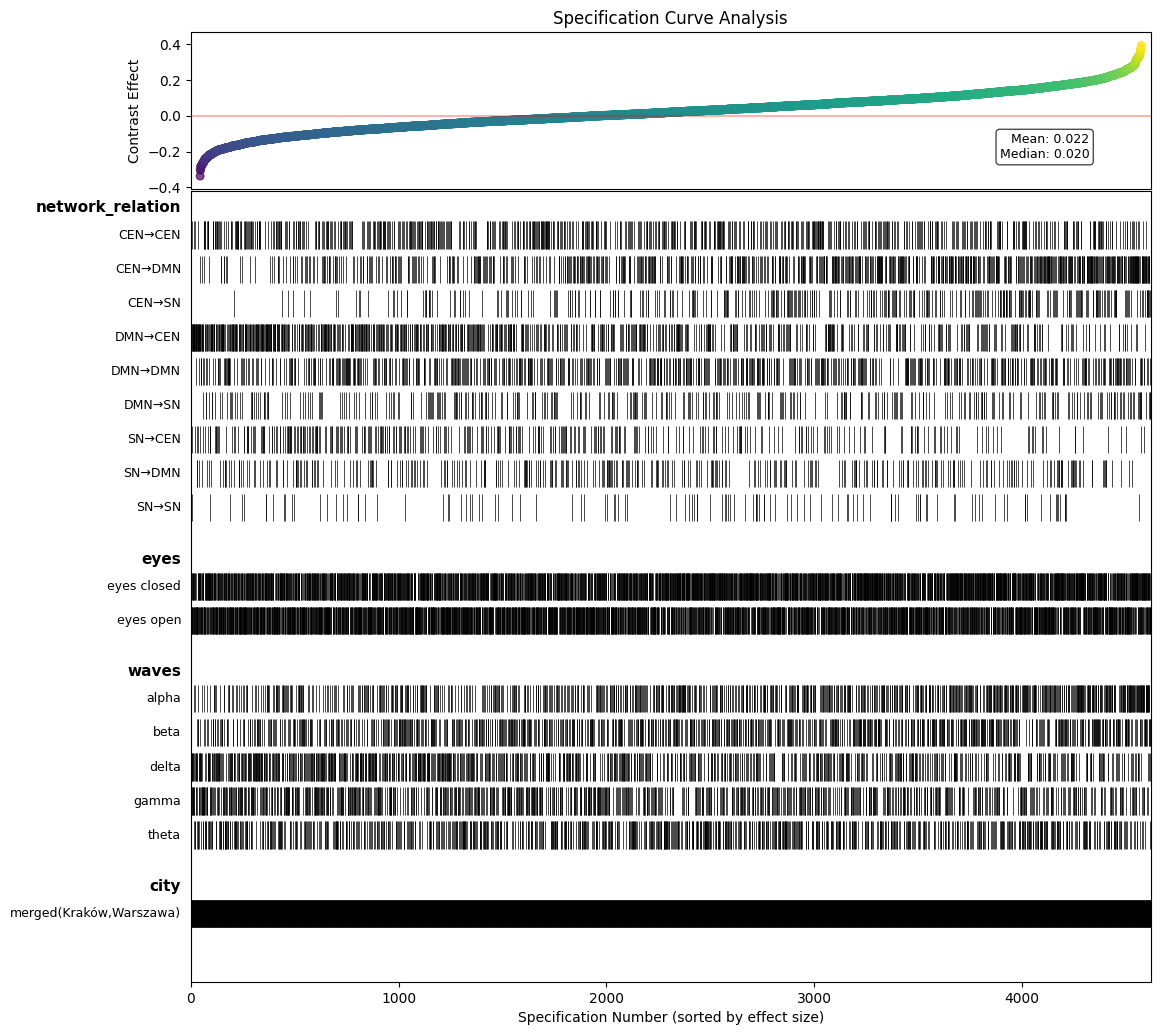

In [6]:
# Generate a specification curve with unmerged data
print("Generating quick specification curve...")
spec_df, results_df = study2.specification_curve(add_network_categories=True)

### Detailed Density Plot (Merged Data)

This visualization provides a more detailed view using density plot.

Generating detailed density plot...


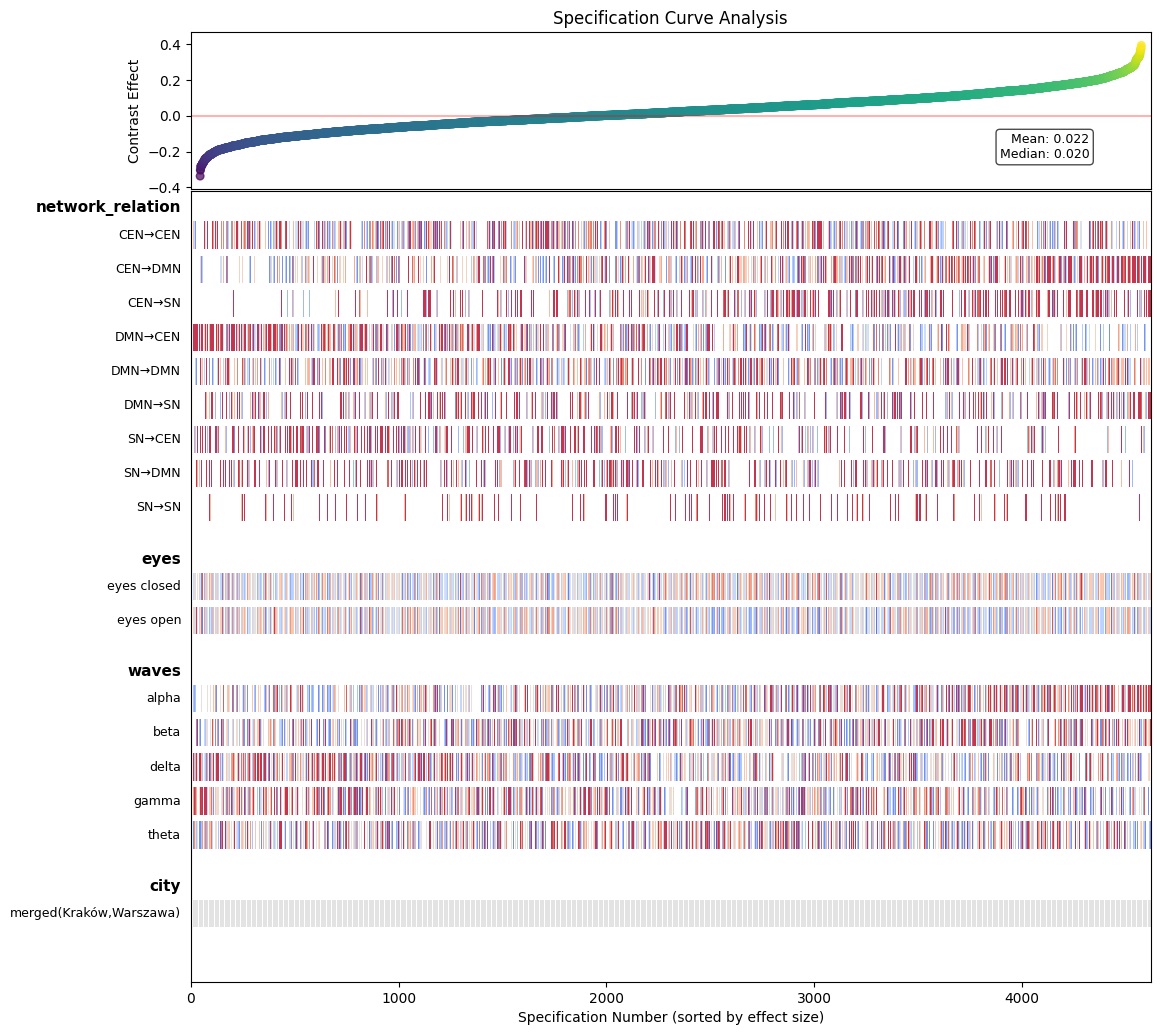

In [8]:
# Generate a detailed specification curve with density plot
# Note: This may take longer to render
print("Generating detailed density plot...")
spec_df2, results_df2 = study2.specification_curve(add_network_categories=True, plot_type = 'density')

